In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

### Use the data to complete the following tasks:

#### Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

In [21]:
df = pd.read_csv('/kaggle/input/timeseries-dataset/fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

In [22]:
df.columns

Index(['value'], dtype='object')

In [23]:
df.shape

(1304, 1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [25]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


#### Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [26]:
# Method 1 (using slicing)
import math
tot = df['value'].count()
dfc = pd.concat([df.iloc[:math.floor(tot*0.025)], df.iloc[math.floor(tot*0.975)-1:]])['value']
df = df.drop(dfc.index)

# Method 2 (using quantile)
# Clean data: remove top 2.5% and bottom 2.5%
# low = df["value"].quantile(0.025)
# high = df["value"].quantile(0.975)
# dfc = df[(df["value"] >= low) & (df["value"] <= high)]

#### Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

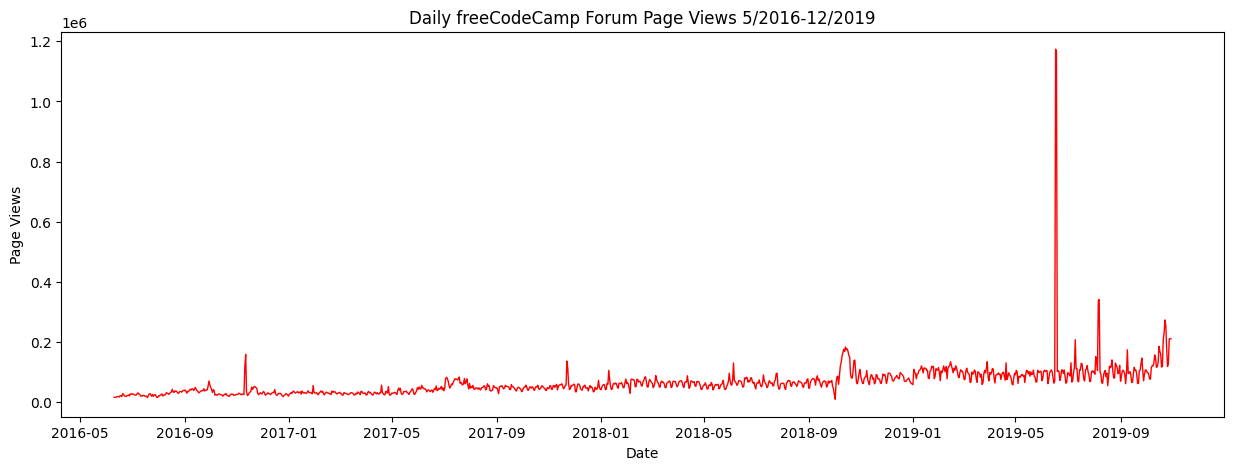

In [27]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df.index, df["value"], color="red", linewidth=1)

    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")

    # Save image and return fig
    # fig.savefig("line_plot.png")
    # return fig
draw_line_plot()

#### Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

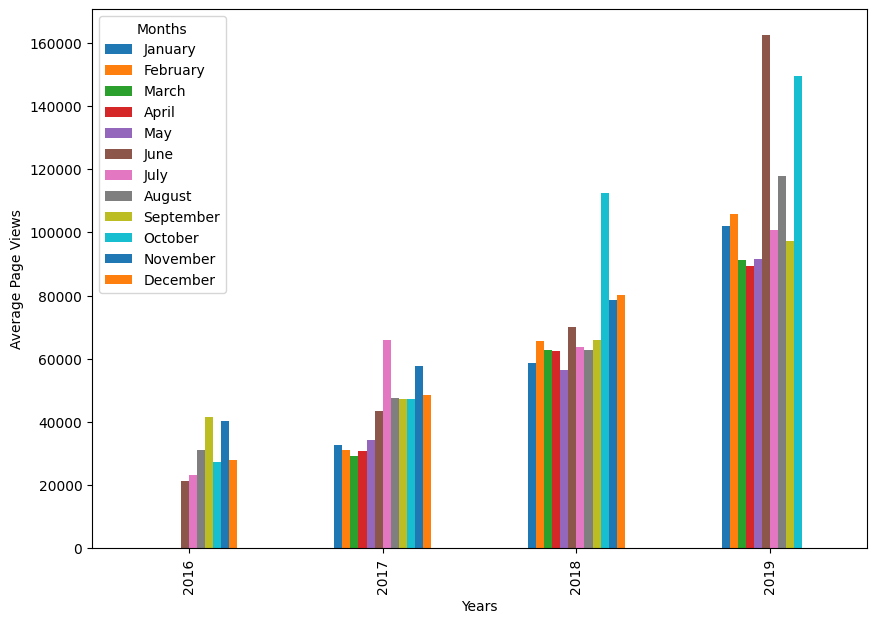

In [28]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month

    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack() 

    # Draw bar plot
    fig = df_bar.plot.bar(figsize=(10, 7), ylabel="Average Page Views", xlabel="Years").get_figure()
    plt.legend(
        title="Months",
        labels=[
            "January", "February", "March", "April", "May", "June",
            "July", "August", "September", "October", "November", "December"
        ]
    )
    # Save image and return fig (don't change this part)
    # fig.savefig('bar_plot.png')
    # return fig
    
draw_bar_plot()


#### Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

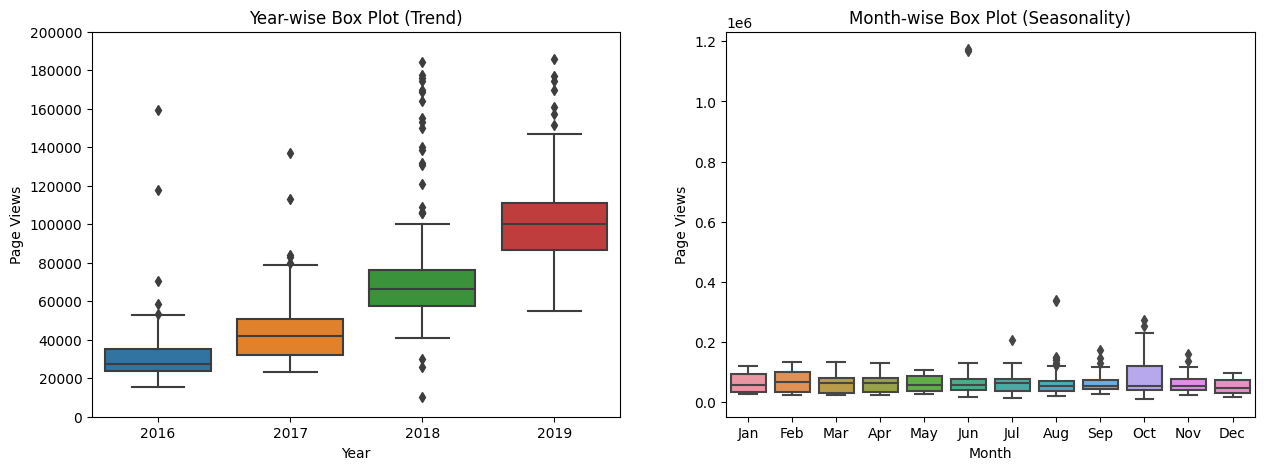

In [29]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy().reset_index()
    df_box["year"] = df_box["date"].dt.year
    df_box["month"] = df_box["date"].dt.strftime("%b")

    # Draw box plots (using Seaborn)
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    sns.boxplot(x="year", y="value", data=df_box, ax=axes[0])
    axes[0].set_title("Year-wise Box Plot (Trend)")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Page Views")

    # Month-wise Box Plot (Seasonality)
    month_order = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
    sns.boxplot(x="month", y="value", data=df_box, order=month_order, ax=axes[1])
    axes[1].set_title("Month-wise Box Plot (Seasonality)")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Page Views")

    y_ticks = list(range(0, 200001, 20000))
    axes[0].set_ylim(0, 200000)
    axes[0].set_yticks(y_ticks)
    axes[0].set_yticklabels([str(v) for v in y_ticks])

    # Save and return
    # fig.savefig("box_plot.png")
    # return fig
draw_box_plot()